# shopping behavior updated

 Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

# Missing value imputation

load dataset

In [3]:
df = pd.read_csv("shopping_behavior_updated.csv")
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


In [4]:
df.shape

(3900, 18)

In [5]:
df.size

70200

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
mvp= df.isnull().sum()/df.shape[0] * 100
mvp

Customer ID               0.0
Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

# Now select data type which has integer & float

In [10]:
df1=df.select_dtypes(include=['int64','float64'])
df1.head()
#Now df1 contains all the numberical column

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31


<Axes: >

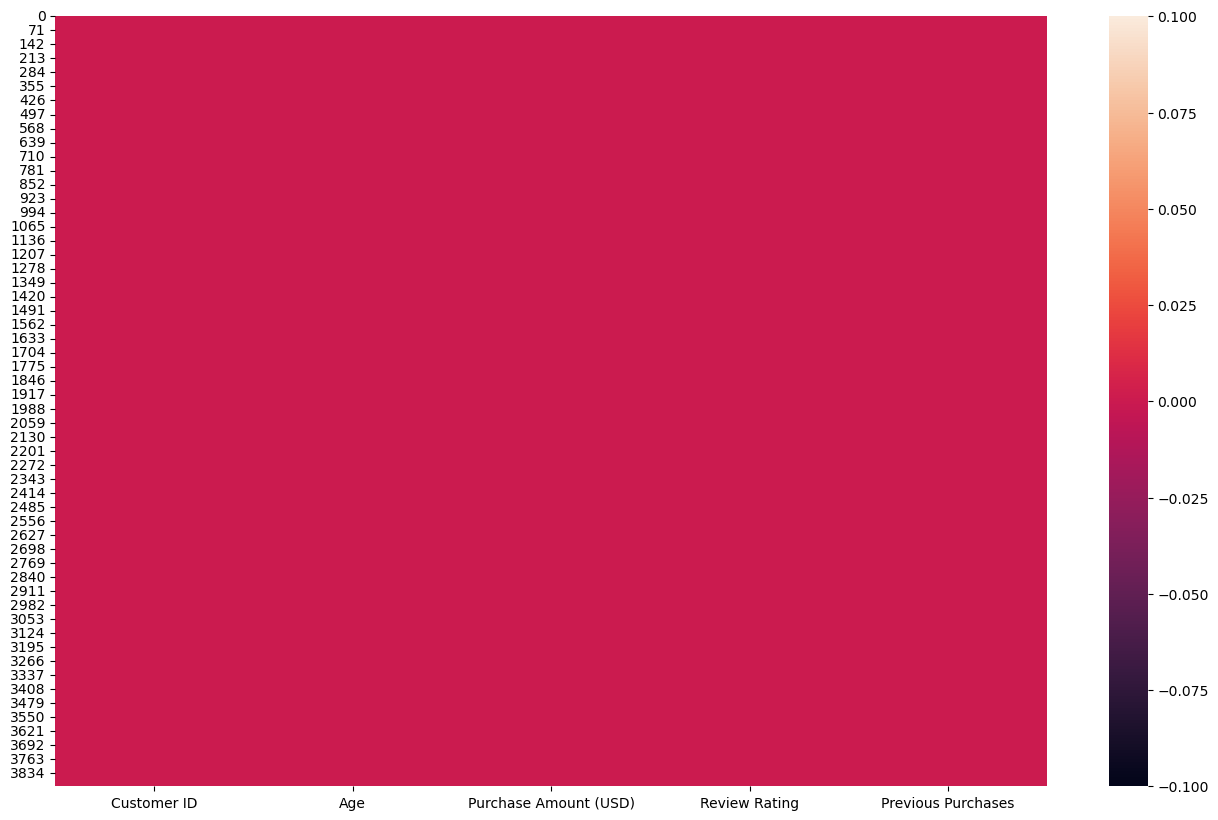

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.isnull())

In [12]:
df2 = [var for var in df1.columns 
                   if df1[var].isnull().sum()>0]
df2

# We get  variable names that has values missing

[]

In [13]:
df1_mean = df1.fillna(df1.mean()) 
#fillna() is used to fill missing values 
### now we fill it using mean

df1_mean.isnull().sum().sum()

0

In [14]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df2):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':2, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df1_mean[var], bins=20, kde_kws={'linewidth':4, 'color':'green'},label="Mean",)
    plt.legend()

<Figure size 1000x1000 with 0 Axes>

In [15]:
df1_median = df1.fillna(df1.median())
df1_median.isnull().sum().sum()

0

In [16]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually


In [17]:
cat_vars.isnull().sum()

Gender                    0
Item Purchased            0
Category                  0
Location                  0
Size                      0
Color                     0
Season                    0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [18]:
df3= cat_vars.isnull().mean()*100
df3

Gender                    0.0
Item Purchased            0.0
Category                  0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

In [19]:
cat_vars['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [20]:
cat_vars['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [21]:
cat_vars['Gender'].fillna('Female',inplace=True)

In [22]:
cat_vars.isnull().sum().sum()

0

In [23]:
df.update(cat_vars)

In [24]:
df["Gender"].isnull().sum()

0

In [25]:
df.update(df1_mean)

In [26]:
dummy_df=pd.get_dummies(df['Location'])
dummy_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Remove first level to get k-1 dummies out of k categorical levels
dummy_df=pd.get_dummies(df['Location'], drop_first=True) 
dummy_df

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Merge dummpy variable

In [28]:
merged = pd.concat([df,dummy_df],axis=1)
merged

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,False,False,False,False,False,False,False,False,False,False
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,False,False,False,False,False,False,False,False,False,False
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,False,False,False,False,False,False,False,False,False,False
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,False,False,False,False,False,False,False,False,False,False
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,False,False,False,False,False,True,False,False,False,False
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,False,False,False,False,False,False,False,False,False,False
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,False,False,False,False,False,False,False,False,False,False
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,False,False,False,False,False,False,False,False,False,False


In [29]:
final = merged.drop(['Customer ID'], axis=1)

final

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,False,False,False,False,False,False,False,False,False,False
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,False,False,False,False,False,False,False,False,False,False
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,...,False,False,False,False,False,True,False,False,False,False
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,...,False,False,False,False,False,False,False,False,False,False
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,...,False,False,False,False,False,False,False,False,False,False
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Now update "final" which contains all the categorical into number into orginal databas
print("Original Database...................................")
df.head()

Original Database...................................


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [31]:
print("After updating the 'final' with 'df'.............................")
df.update(final)
df

After updating the 'final' with 'df'.............................


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Using OneHot Encoding

In [32]:
oh_enc = OneHotEncoder(sparse=False,)
#will return sparse matrix if set True else will return array
# It provide output in Numpy array

In [33]:
oh_enc=OneHotEncoder(sparse=False,drop='first')

In [34]:
oh_enc_df=merged.drop(['Location'], axis=1)
oh_enc_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,...,False,False,False,False,False,False,False,False,False,False
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,...,False,False,False,False,False,False,False,False,False,False
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,L,Turquoise,Summer,4.2,...,False,False,False,False,False,True,False,False,False,False
3896,3897,52,Female,Backpack,Accessories,49,L,White,Spring,4.5,...,False,False,False,False,False,False,False,False,False,False
3897,3898,46,Female,Belt,Accessories,33,L,Green,Spring,2.9,...,False,False,False,False,False,False,False,False,False,False
3898,3899,44,Female,Shoes,Footwear,77,S,Brown,Summer,3.8,...,False,False,False,False,False,False,False,False,False,False


In [35]:
oh_enc_df['West Virginia']=final[['South Dakota']].copy()

oh_enc_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,...,False,False,False,False,False,False,False,False,False,False
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,...,False,False,False,False,False,False,False,False,False,False
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,L,Turquoise,Summer,4.2,...,False,False,False,False,False,True,False,False,False,False
3896,3897,52,Female,Backpack,Accessories,49,L,White,Spring,4.5,...,False,False,False,False,False,False,False,False,False,False
3897,3898,46,Female,Belt,Accessories,33,L,Green,Spring,2.9,...,False,False,False,False,False,False,False,False,False,False
3898,3899,44,Female,Shoes,Footwear,77,S,Brown,Summer,3.8,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Now we drop the last dummy variable 
oh_enc_df.drop("South Dakota",axis=1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,...,South Carolina,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,...,False,False,False,False,False,False,False,False,False,False
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,...,False,False,False,False,False,False,False,False,False,False
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,...,False,False,False,False,False,False,False,False,False,False
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,L,Turquoise,Summer,4.2,...,False,False,False,False,False,True,False,False,False,False
3896,3897,52,Female,Backpack,Accessories,49,L,White,Spring,4.5,...,False,False,False,False,False,False,False,False,False,False
3897,3898,46,Female,Belt,Accessories,33,L,Green,Spring,2.9,...,False,False,False,False,False,False,False,False,False,False
3898,3899,44,Female,Shoes,Footwear,77,S,Brown,Summer,3.8,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df1.update(oh_enc_df)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Label Encoding 

In [38]:
df1 

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [39]:
df1 

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


In [40]:
# Now work on Grade coloumn

In [41]:
order_Label = {"Vgood":3,"Good":2,"Avg":1,"Fail":0}

# Feature Scaling

In [42]:
MinMaxScaler()

MinMaxScaler()

# Feature Scaling
# Standardization&Normalization

In [43]:
# we have take 4 Numberic variables
df2=df[['Customer ID',"Category",'Age','Purchase Amount (USD)']]
df2.head()

,Customer ID,Category,Age,Purchase Amount (USD)
0,1,Clothing,55,53
1,2,Clothing,19,64
2,3,Clothing,50,73
3,4,Footwear,21,90
4,5,Clothing,45,49


In [44]:
#Now first clear the data

In [45]:
#Convert data in Matrix and Vector form
#Bez independ variables in Matrix form
#dependend variables in vector form

In [46]:
#Split arrays or matrices into random train and test subsets.

# MinMaxScaler()

In [50]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

A venture capitalist company has hired you as a # ML engineer. Your role is to create a model that can predict the profit of the company based on company's spending pattern and the location of the company

# Method-1

In [49]:
le.fit_transform(df["Subscription Status"])

NameError: name 'le' is not defined

In [ ]:
# Simple Linear Regreassion

# Problem Statement example for Simple Linear Regression:

# Data Pre-processing

In [ ]:
x=df.iloc[:, :-1].values #we have taken-1value since we want to remove tha last column from tha dataset
y=df.iloc[:, 1].values
#we have taken 1 value as a parameter,since we want to extract tha second column and indexing starts fro

In [ ]:
# Splitting the dataset into training and test set. 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size= 1/3, random_state=0)  
#We have 30 observations, so we will take 20 observations for the training set and 10 observations for the test set.

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# visualizing the Training set results:

In [ ]:
#visualizing the Test set results    
plt.plot(x_train, x_pred,)    
plt.title("Payment Method vs Discount Applied(Test Dataset)")  
plt.xlabel("Years of Discount Applied")  
plt.ylabel("Payment Method(In Rupees)")  
plt.show()  

# Predict the Salary by putting Experience

# Linear Regression formula ==== y=mx+b

In [ ]:
# Now first calculate value of m == m will be our slope of regression line
m=lr.coef_
m

In [ ]:
# Now find intercept with y-axis  b== will be our intercept
b=lr.intercept_
b

In [ ]:
# y = mx + b

y1=m * 1.5 + b  
# Why we take x value is 1.5 for that print x_test 
# in x_test we have 10 values we can take any value as x & USING formula y=mx+b WE predicit salary offter to paricular exp.
y1

# Calculate Score of Model

In [ ]:
lr.score(x_test, y_test)

# Polynomial Regression

In [ ]:
df.head()

In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, 1:2].values  
y= df.iloc[:, 2].values  
print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)
# in this example we not consider the "Position" column

In [ ]:
x=df['Season']
y=df['Discount Applied']
print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)
# in this example we not consider the "Position" column

In [ ]:
y

# Linear regression model:

# Polynomial regression model

In [ ]:
#Fitting the Polynomial regression to the dataset
plr= PolynomialFeatures(degree= 3)
x_poly= plr.fit_transform(x)  
lr_1 =LinearRegression()  
lr_1.fit(x_poly, y)  